# PREDICT 410 Bonus00
### Alan Kessler

The purpose of the assignment is to take a simple training data set, generate predictions for a test data set, and submit the results to Kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

### Simple Data Exploration

I load the data manually due to its small size and missing values in the CSVs that would have needed to be cleaned up.

In [2]:
# Load training data
train = pd.DataFrame({'X':[10,13,11,6,12,7,5], 
                      'Y':[7.46,12.74,7.81,6.08,8.15,6.42,5.73]})
train

,X,Y
0,10,7.46
1,13,12.74
2,11,7.81
3,6,6.08
4,12,8.15
5,7,6.42
6,5,5.73


A scatter plots shows a possible linear relationship between **X** and **Y**. However, there looks to be an outlier at **X = 13**. Being one of only seven points, it is unknown if the value is truly an outlier or an informative part of the data.

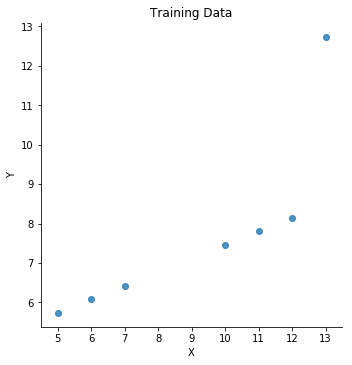

In [3]:
# Create scatterplot of the training data
sns.lmplot('X', 'Y', train, fit_reg=False)
plt.title('Training Data')
plt.show()

Due to the clear linear relationship for the other observations, I choose to exclude the possible outlier from the training data for model fitting purposes.

In [4]:
train_filtered = train[train['X'] != 13]

### Ordinary Least Squares

Fit a linear regression to the training data excluding the possible outlier due to the observed linear relationship in the data.

In [5]:
ols = linear_model.LinearRegression()
ols.fit(train_filtered[['X']].values, train_filtered[['Y']].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

I generate predictions for the test data rounded to match the significant digits of the training data. 

In [6]:
preds = pd.DataFrame({'X':[8,9,14,4]})
preds['Y'] = np.round(ols.predict(preds[['X']].values), 2)
preds

,X,Y
0,8,6.77
1,9,7.11
2,14,8.84
3,4,5.39


### Output Final Results to CSV

I export the test results in a csv matching the sample submission on Kaggle.

In [7]:
preds.to_csv('kessler_bonus00.csv', index=False)

After submitting to Kaggle, it turns out that the possible outlier was an outlier after all.